# ME 664: Assignment1
Jialin Wang: 21107280

## Part1: Calculations
**Mean velocities:**

In [6]:
import numpy as np

#Inport and reshape data file1,2,3
file_names = ['file{}.txt'.format(i) for i in range(1, 4)]
datasets = [np.reshape(np.loadtxt(file_name), (-1, 2)) for file_name in file_names]

u_means = []
v_means = []

for i, dataset in enumerate(datasets): 
    u_mean = np.mean(dataset[:, 0])
    v_mean = np.mean(dataset[:, 1])

    #Save average value
    u_means.append(u_mean)
    v_means.append(v_mean)

    print(f'At point y{i+1} u average={u_mean:.6e}, v average={v_mean:.6e}')



At point y1 u average=1.138112e-01, v average=3.979216e-04
At point y2 u average=1.114778e-01, v average=1.734535e-04
At point y3 u average=9.699681e-02, v average=-1.490965e-04


**Fluctuating components: rms & $\overline{u'v'}$:**

In [7]:
# Compute RMS (root mean square)
u_rms_values = []
v_rms_values = []

uv_primes = [] 
uu_primes = []
vv_primes = []

u_flucts = []
v_flucts = []

for i, dataset in enumerate(datasets): 
    # Compute RMS (root mean square)
    u_rms = np.sqrt(np.mean(dataset[:, 0]**2))
    v_rms = np.sqrt(np.mean(dataset[:, 1]**2))

    # Compute Reynolds stress (u'v') 
    uv_prime = np.mean((dataset[:, 0] - u_means[i]) * (dataset[:, 1] - v_means[i])) 
    uu_prime = np.mean((dataset[:, 0] - u_means[i]) * (dataset[:, 0] - u_means[i])) 
    vv_prime = np.mean((dataset[:, 1] - v_means[i]) * (dataset[:, 1] - v_means[i])) 

    u_rms_values.append(u_rms)
    v_rms_values.append(v_rms)
    
    uv_primes.append(uv_prime)
    uu_primes.append(uu_prime)
    vv_primes.append(vv_prime)

    u_flucts.append(dataset[:, 0] - u_means[i])
    v_flucts.append(dataset[:, 1] - v_means[i])
    
    print(f'At point y{i+1} u_rms={u_rms:.6e}, v_rms={v_rms:.6e}, uv_prime={uv_prime:.6e}')

# print(uu_primes)

At point y1 u_rms=1.143791e-01, v_rms=1.038283e-02, uv_prime=-1.319239e-06
At point y2 u_rms=1.120363e-01, v_rms=1.019851e-02, uv_prime=-5.055627e-06
At point y3 u_rms=9.774195e-02, v_rms=9.486065e-03, uv_prime=-3.679083e-05


**Turbulent Kinetic Energy:**

In [8]:
k_s=[]
for i, dataset in enumerate(datasets):
    k = 0.5*np.mean((dataset[:, 0] - u_means[i])**2 + (dataset[:, 1] - v_means[i])**2)
    k_s.append(k)
    print(f'TKE at point y{i+1} = {k:.6e}')

TKE at point y1 = 1.186218e-04
TKE at point y2 = 1.144060e-04
TKE at point y3 = 1.175351e-04


**Normalized correlations:**

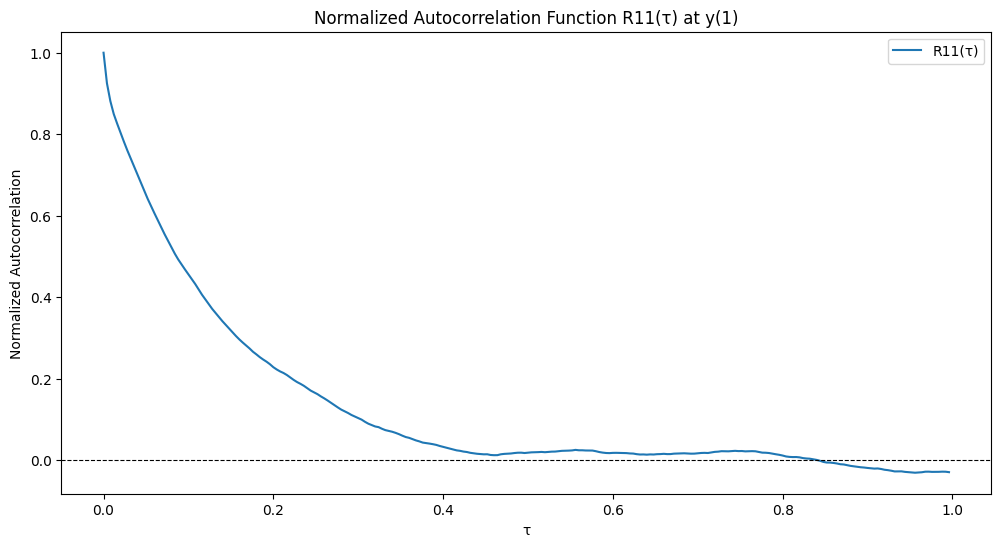

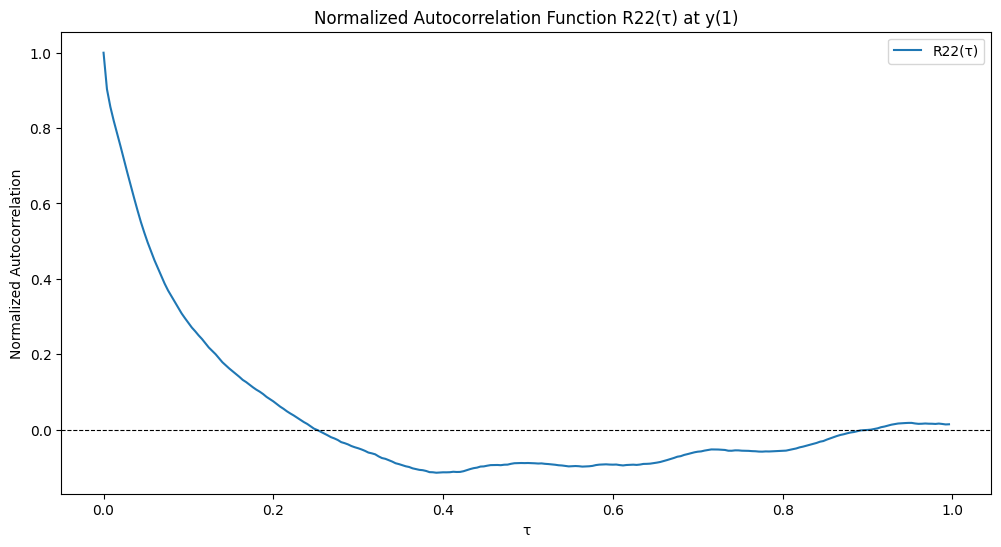

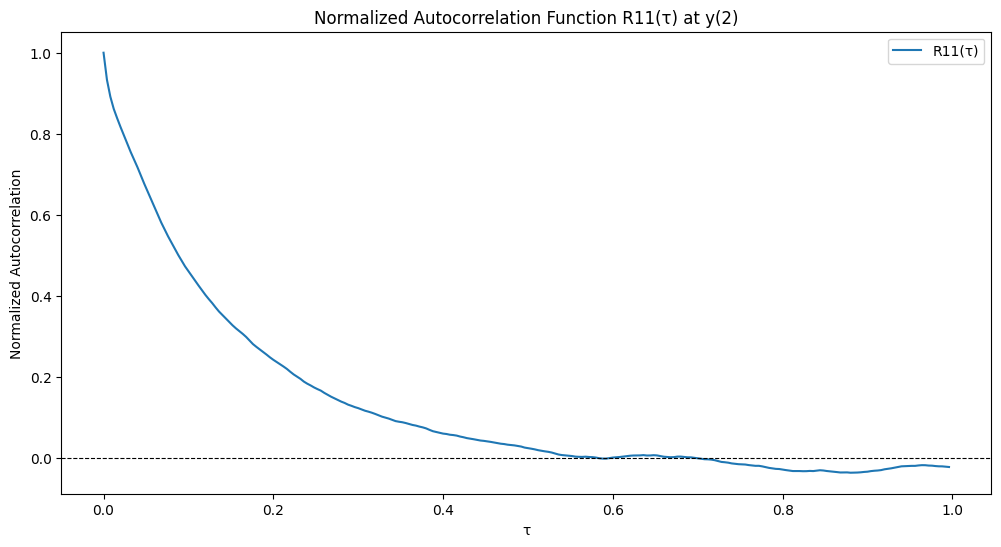

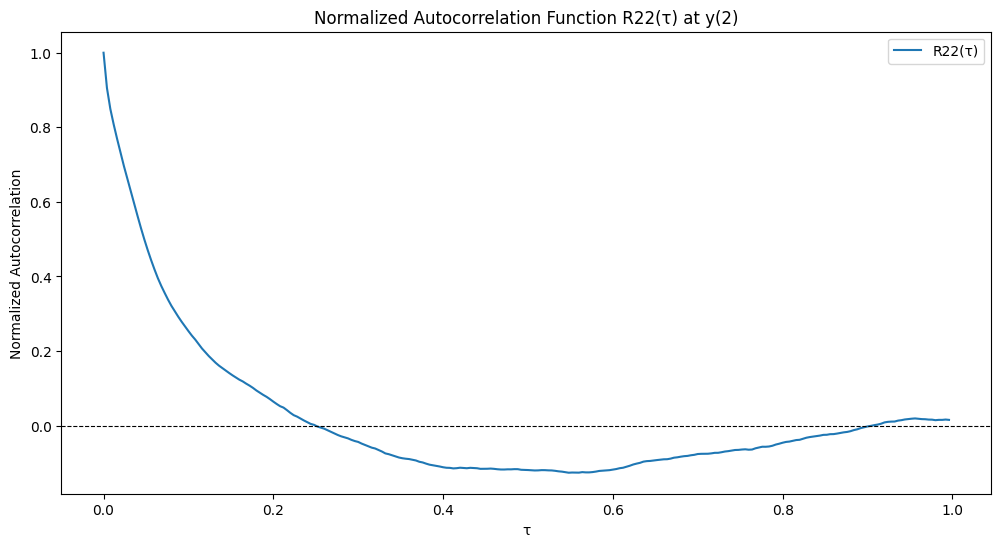

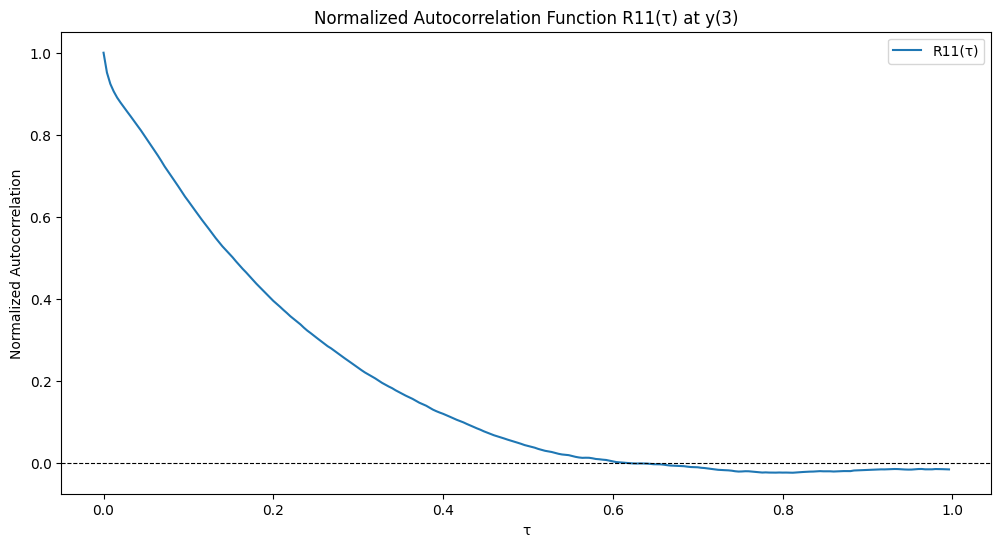

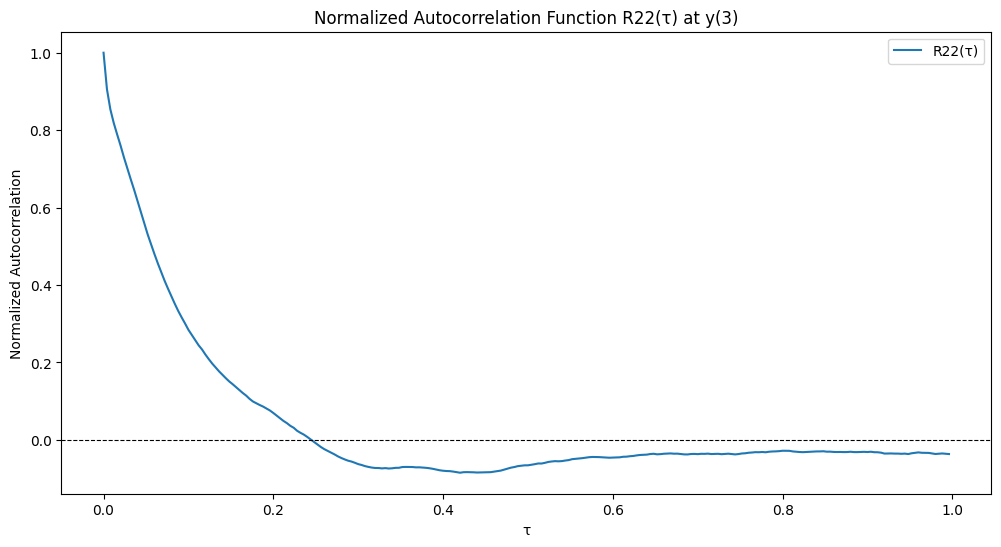

In [9]:
import matplotlib.pyplot as plt
f = 250
dt=1/f
n = len(dataset[:, 0]) 
tao = np.arange(0, (n-1)*dt, dt)
R11 = []
R22 = []

for i, dataset in enumerate(datasets):

    R11.append([])  
    R22.append([])  
    
    denominator_u= np.sum((dataset[:, 0]-u_means[i])**2)
    denominator_v= np.sum((dataset[:, 1]-v_means[i])**2)
    
    j=0
    while j < n-1:
        numerator_u = np.sum((dataset[0:n-j, 0]-u_means[i])*(dataset[j:, 0]-u_means[i]))
        R11[i].append(numerator_u / denominator_u)

        numerator_v = np.sum((dataset[0:n-j, 1]-v_means[i])*(dataset[j:, 1]-v_means[i]))
        R22[i].append(numerator_v / denominator_v)
        j+=1

#we only demonstrate the R11(tao) and R22(tao) in the first 1s.
    plt.figure(figsize=(12, 6))
    plt.plot(tao[0:250], R11[i][0:250], label='R11(τ)')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.xlabel('τ')
    plt.ylabel('Normalized Autocorrelation')
    plt.title(f'Normalized Autocorrelation Function R11(τ) at y({i+1})')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(tao[0:250], R22[i][0:250], label='R22(τ)')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.xlabel('τ')
    plt.ylabel('Normalized Autocorrelation')
    plt.title(f'Normalized Autocorrelation Function R22(τ) at y({i+1})')
    plt.legend()
    plt.show()

    



**Integral time scale:**

The integral scale L can be expressed as $L = \int_0^{{\tau _0}} {R_{ii}(\tau )} d\tau$. where $\tau _0$ is the lag time at which the autocorrelation function first becomes zero.

In [10]:
def calculate_integral_scale(R, tao):
    # Find the index where R crosses zero for the first time
    zero_crossings = np.where(np.diff(np.sign(R)))[0]
    if zero_crossings.size > 0:
        # If R crosses zero, use the index of the first zero crossing
        idx_zero_crossing = zero_crossings[0]
    else:
        # If R never crosses zero, integrate over the entire range
        idx_zero_crossing = len(R) - 1
    
    # Calculate the integral scale using the trapezoidal rule up to the first zero crossing
    integral_scale = np.trapz(R[:idx_zero_crossing+1], tao[:idx_zero_crossing+1])
    
    return integral_scale

# Calculating the integral scale for the first dataset for R11 and R22
integral_scales_R11 = [calculate_integral_scale(R, tao) for R in R11]
integral_scales_R22 = [calculate_integral_scale(R, tao) for R in R22]

for i in range(len(datasets)):
    print(fr'Longitudinal Integral time scales at y({i+1}) = {integral_scales_R11[i]:.6e}')
    print(fr'Transverse Integral time scales at y({i+1}) = {integral_scales_R22[i]:.6e}')

# integral_scales_R11 and integral_scales_R22 now contain the integral scales for each dataset


Longitudinal Integral time scales at y(1) = 1.297680e-01
Transverse Integral time scales at y(1) = 7.321698e-02
Longitudinal Integral time scales at y(2) = 1.330036e-01
Transverse Integral time scales at y(2) = 6.846449e-02
Longitudinal Integral time scales at y(3) = 1.879644e-01
Transverse Integral time scales at y(3) = 7.388788e-02


**Taylor time scales:**

 $\tau_{\text {Taylor }}=\left[-\frac{2}{\left.\frac{\partial^2 R}{\partial \tau^2}\right|_{\tau=0}}\right]^{1 / 2}$

In [11]:
def calculate_taylor_microscale(R, dt):
    # Estimate the second derivative at tau = 0 using finite differences:
    R_double_prime_at_0 = (R[1] - 2*R[0] + R[1]) / (dt**2)
    
    # Calculate the Taylor microscale using the provided formula
    taylor_microscale = np.sqrt(-2.0 /R_double_prime_at_0)
    return taylor_microscale

# calculate the Taylor microscale for each dataset
taylor_scales_R11 = []
taylor_scales_R22 = []

for i in range(len(datasets)):
    taylor_scale_R11 = calculate_taylor_microscale(R11[i], dt)
    taylor_scales_R11.append(taylor_scale_R11)
    
    taylor_scale_R22 = calculate_taylor_microscale(R22[i], dt)
    taylor_scales_R22.append(taylor_scale_R22)
    
    print(fr'Longitudinal taylor time scales at y({i+1}) = {taylor_scale_R11:.6e}')
    print(fr'Transverse taylor time scales at y({i+1}) = {taylor_scale_R22:.6e}')

Longitudinal taylor time scales at y(1) = 1.460583e-02
Transverse taylor time scales at y(1) = 1.287354e-02
Longitudinal taylor time scales at y(2) = 1.547435e-02
Transverse taylor time scales at y(2) = 1.301051e-02
Longitudinal taylor time scales at y(3) = 1.816774e-02
Transverse taylor time scales at y(3) = 1.303509e-02


**Integral length scale：**

In [12]:
for i in range(len(datasets)):
    print(fr'Longitudinal integral length scales at y({i+1}) = {integral_scales_R11[i]*u_means[i]:.6e}')
    print(fr'Transverse integral length scales using R22 at y({i+1}) = {integral_scales_R22[i]*u_means[i]:.6e}')

Longitudinal integral length scales at y(1) = 1.476904e-02
Transverse integral length scales using R22 at y(1) = 8.332909e-03
Longitudinal integral length scales at y(2) = 1.482695e-02
Transverse integral length scales using R22 at y(2) = 7.632271e-03
Longitudinal integral length scales at y(3) = 1.823195e-02
Transverse integral length scales using R22 at y(3) = 7.166889e-03


**Taylor length scale：**

In [13]:
for i in range(len(datasets)):
    print(fr'Longitudinal Taylor length scales at y({i+1}) = {taylor_scales_R11[i]*u_means[i]:.6e}')
    print(fr'Transverse Taylor length scales at y({i+1}) = {taylor_scales_R22[i]*u_means[i]:.6e}')

Longitudinal Taylor length scales at y(1) = 1.662306e-03
Transverse Taylor length scales at y(1) = 1.465153e-03
Longitudinal Taylor length scales at y(2) = 1.725046e-03
Transverse Taylor length scales at y(2) = 1.450384e-03
Longitudinal Taylor length scales at y(3) = 1.762213e-03
Transverse Taylor length scales at y(3) = 1.264362e-03


**Turbulent Reynolds number：**

$R e_{\lambda_g}=\frac{\sqrt{k} \lambda_g}{\nu}$

In [14]:
nu = 0.8926e-6
Re_lambda_g_s=[]
for i in range(len(datasets)):
    Re_lambda_g = np.sqrt(k_s[i]) * (taylor_scales_R22[i]*u_means[i]) / nu
    Re_lambda_g_s.append(Re_lambda_g)
    print(fr'Turbulent Reynolds number at y({i+1}) = {Re_lambda_g:.6e}')

Turbulent Reynolds number at y(1) = 1.787756e+01
Turbulent Reynolds number at y(2) = 1.738003e+01
Turbulent Reynolds number at y(3) = 1.535671e+01


**Dissipation rate:**

$\epsilon=\frac{10 k^{3 / 2}}{R e_{\lambda_g} \lambda_g}$

In [15]:
dissipation_rates=[]
for i in range(len(datasets)):
    dissipation_rate = 10.0 * np.power(k_s[i], 1.5) / (Re_lambda_g_s[i] * (taylor_scales_R22[i]*u_means[i]))
    dissipation_rates.append(dissipation_rate)
    print(fr'Dissipation rate at y({i+1}) = {dissipation_rate:.6e}')

Dissipation rate at y(1) = 4.932369e-04
Dissipation rate at y(2) = 4.854448e-04
Dissipation rate at y(3) = 6.562684e-04


**Kolmogorov scales:**

$\begin{array}{l}
\eta  \equiv {({\nu ^3}/\varepsilon )^{1/4}}\\
{\tau _\eta } \equiv {(\nu /\varepsilon )^{1/2}}
\end{array}$

In [16]:
for i in range(len(datasets)):
    Kolmogorov_length_scale = np.power(np.power(nu, 3) / dissipation_rates[i], 0.25)
    Kolmogorov_time_scale = np.sqrt(nu / dissipation_rates[i])
    print(fr'Kolmogorov length scale at y({i+1}) = {Kolmogorov_length_scale:.6e}')
    print(fr'Kolmogorov time scale at y({i+1}) = {Kolmogorov_time_scale:.6e}')

Kolmogorov length scale at y(1) = 1.948627e-04
Kolmogorov time scale at y(1) = 4.254031e-02
Kolmogorov length scale at y(2) = 1.956400e-04
Kolmogorov time scale at y(2) = 4.288037e-02
Kolmogorov length scale at y(3) = 1.814355e-04
Kolmogorov time scale at y(3) = 3.687973e-02


**Probability Density Function (PDF):**

Compute and plot the pdf of u* at y1. Overlay the normal (Gaussian) distribution using the mean and variance of the present experimental data. Use normalized quantities, i.e.

${u^*} = \frac{{u - {u_{\min }}}}{{{u_{\max }} - {u_{\min }}}}$

where u* is the normalized x-component of the velocity, umin is the minimum value of u and umax is the largest value of u. Note that u* varies between 0 and 1. You must recalculate the mean and variance corresponding to u*.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


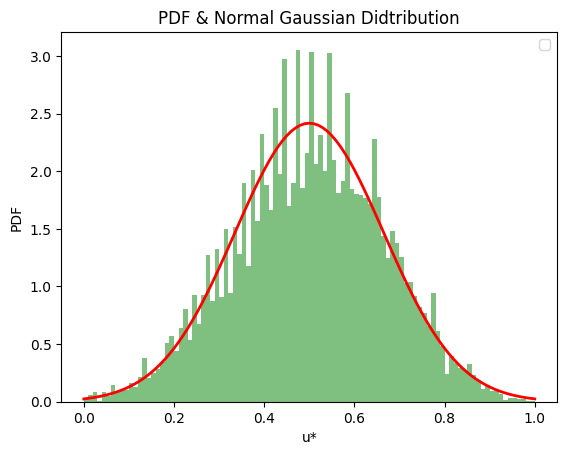

In [17]:
import pandas as pd
from scipy.stats import norm

u_star = (datasets[0][:,0] - np.min(datasets[0][:,0])) / (np.max(datasets[0][:,0]) - np.min(datasets[0][:,0]))

mean_u_star = np.mean(u_star)
var_u_star = np.var(u_star)

count, bins, ignored = plt.hist(u_star, 100, density=True, alpha=0.5, color='g')

pd = norm.pdf(bins, mean_u_star, np.sqrt(var_u_star))
plt.plot(bins, pd, linewidth=2, color='r')
plt.xlabel('u*')
plt.ylabel('PDF')
plt.title(f'PDF & Normal Gaussian Didtribution')
plt.legend()
plt.show()

**One-dimensional spectra**

$E(k) = \frac{1}{{\pi }}\int\limits_{ - \infty }^\infty  {R(\xi )} {e^{ - ik\xi }}d\xi$

$E(k)$ is the energy per unit mass contained in the wavenumber.

$R(\xi )$ is the autocorrelation function of the velocity field,
$R(\xi ) = \left\langle {u(x)u(x + \xi )} \right\rangle$. 


C:\Users\11449\AppData\Local\Temp\ipykernel_32968\460559207.py:23: RuntimeWarning: divide by zero encountered in power
  E_kolmogorov = 0.0001 * f_kolmogorov**(-5/3)


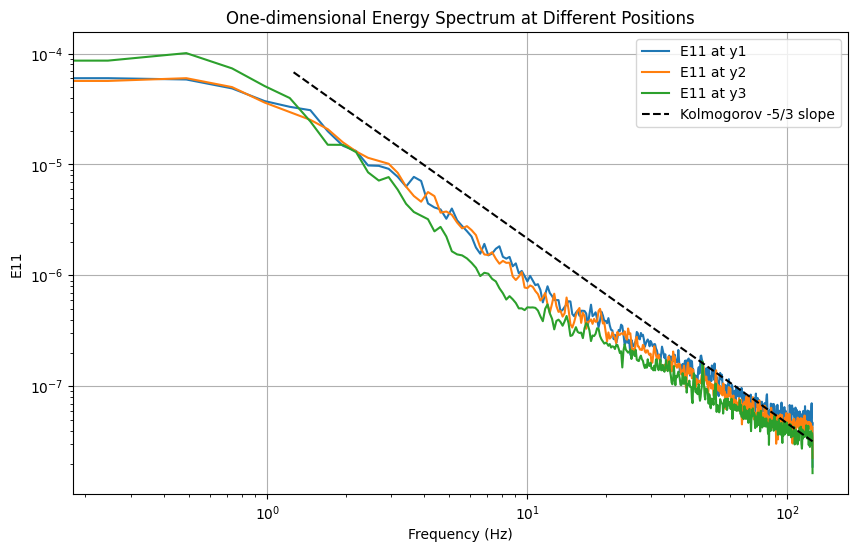

In [37]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import welch
import math

dt = 1/250

def calculate_energy_spectrum(velocity, dt):
    f, Pxx = welch(velocity, fs=1/dt, nperseg=1024,scaling='density')
    return f, Pxx

def plot_energy_spectrum(frequencies, power_spectral_density, position_label):
    plt.loglog(frequencies, power_spectral_density, label=f'Position {position_label}')


plt.figure(figsize=(10, 6))

for i, dataset in enumerate(datasets): 
    f, Pxx = calculate_energy_spectrum(dataset[:, 0], dt)
    plot_energy_spectrum(f, Pxx, i)

f_kolmogorov = np.linspace(min(f), max(f), 100)
E_kolmogorov = 0.0001 * f_kolmogorov**(-5/3)
plt.loglog(f_kolmogorov, E_kolmogorov, 'k--')


plt.legend(labels=['E11 at y1','E11 at y2','E11 at y3','Kolmogorov -5/3 slope'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('E11')
plt.title('One-dimensional Energy Spectrum at Different Positions')
plt.grid(True)
plt.show()


## Part2: Analysis

**Q1. How does the sample size affect the ensemble averages? Support your answer by calculating the mean velocities using different sample sizes.**

A1: Larger sample sizes tend to yield more reliable averages because they are less susceptible to fluctuations due to random variations in the data. Smaller sample sizes may not capture the full range of the turbulent fluctuations, leading to ensemble averages that are more sensitive to outliers and may not accurately represent the underlying statistics of the flow.

From the figure below, only after 30000 point used for mean_u calculation the average velocity reach a steady state and seems has no relevance to the sample size.

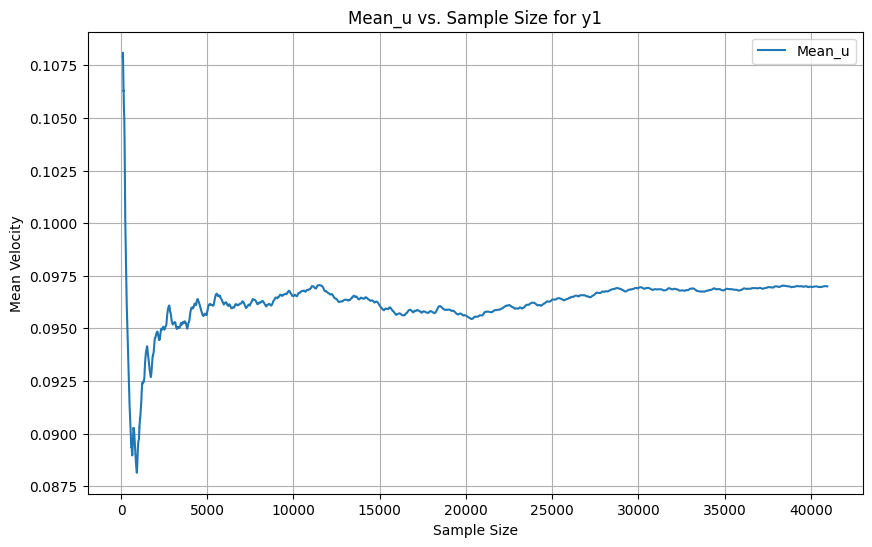

In [161]:
#Take the U velocity at point y1 as an example：
i=1
n = len(dataset[:, 0])   

means = []
size = 100
while size < n-1:
    means.append(np.mean(dataset[0:size,0]))
    size += 1

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(100, n-1), means, label='Mean_u')
plt.xlabel('Sample Size')
plt.ylabel('Mean Velocity')
plt.title(f'Mean_u vs. Sample Size for y1')
plt.legend()
plt.grid(True)
plt.show()



**Q2: Comment on the difference between the mean value calculated**

**i) using all the data points.**

**ii) using samples obtained at a frequency of $\approx 1/{T_T}$ where T is the integral length scale.**

**iii) using a consecutive number of data points equal to that in ii).**

 i) When we calculate the mean using all the data points, we are taking the average over a long period, which ideally encompasses many large-scale turbulent structures (eddies). This will give us an accurate representation of the mean value, assuming the data set is large enough to be statistically representative of the turbulence. However, the mean value may be influenced by outliers or noise in the data.

ii) Sampling at a frequency of $\approx 1/{T_T}$
  means we're essentially capturing the dynamics of the largest scales of the turbulence. The mean calculated this way can be skewed if the larger eddies are not fully representative of the entire turbulent flow, especially if smaller scales contribute significantly to the quantity being averaged.

iii) In this way, we're including more of the smaller-scale turbulence in our average. 
This method could lead to a mean value that is potentially more variable than method (ii) because the smaller scales of turbulence are typically more erratic and less coherent than the larger scales. However, this method may still not capture the full spectrum of turbulence if the number of points is too small.

**Q3: Compare the various time and length scales. Do they make sense? Explain.**

**Different time scales are listed in the following table.**

In [209]:
import pandas as pd

# Define the data
data = {
    "Position": ["y(1)", "y(2)", "y(3)"],
    "Longitudinal Integral Time Scale": [1.297680e-01, 1.330036e-01, 1.879644e-01],
    "Transverse Integral Time Scale": [7.321698e-02, 6.846449e-02, 7.388788e-02],
    "Longitudinal Taylor Time Scale": [1.460583e-02, 1.547435e-02, 1.816774e-02],
    "Transverse Taylor Time Scale": [1.287354e-02, 1.301051e-02, 1.303509e-02]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the "Position" column as the index
df.set_index("Position", inplace=True)

# Display the DataFrame
df


,Longitudinal Integral Time Scale,Transverse Integral Time Scale,Longitudinal Taylor Time Scale,Transverse Taylor Time Scale
Position,,,,
y(1),0.129768,0.073217,0.014606,0.012874
y(2),0.133004,0.068464,0.015474,0.013011
y(3),0.187964,0.073888,0.018168,0.013035


**Explain to Integral and Taylor Time Scales:**

Integral time scales are larger than Taylor time scales because they relate to the larger, energy-containing structures in the flow, whereas Taylor time scales are associated with smaller eddies and more rapid decorrelation. 

Except the transverse integral length time scale have some small fluctuations at t1-y3, other time scales are increase from y1-y3.This Indicate a growing large structure.

**Different length scales are listed in the following table.**


In [36]:
import pandas as pd

# Define the data
data = {
    "Position": ["y(1)", "y(2)", "y(3)"],
    "L11": [1.476904e-02, 1.482695e-02, 1.823195e-02],
    "L22": [8.332909e-03, 7.632271e-03, 7.166889e-03],
    "2*L22": [8.332909e-03*2, 7.632271e-03*2, 7.166889e-03*2],
    'lambda _f': [1.662306e-03, 1.725046e-03, 1.762213e-03],
    "lambda_g": [1.465153e-03, 1.450384e-03, 1.264362e-03],
    f'lambda _f/sqrt(2)': [1.662306e-03/np.sqrt(2), 1.725046e-03/np.sqrt(2), 1.762213e-03/np.sqrt(2)]
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index("Position", inplace=True)
df


,L11,L22,2*L22,lambda _f,lambda_g,lambda _f/sqrt(2)
Position,,,,,,
y(1),0.014769,0.008333,0.016666,0.001662,0.001465,0.001175
y(2),0.014827,0.007632,0.015265,0.001725,0.001450,0.001220
y(3),0.018232,0.007167,0.014334,0.001762,0.001264,0.001246


**Explain to Integral and Taylor Length Scales:**

1. The integral scales are larger than the Taylor scales at all positions. Because integral scales reflect the size of the largest eddies, while Taylor scales are concerned with smaller, energy-carrying eddies.

2. For both Taylor and integral scales, the longitudinal scales are larger than the transverse ones. This suggests that the flow has more pronounced structures in the direction of the flow.

    In isentropic flow, $L_{11}=2*L_{22}$. Ony point y2 quiet satisfy this relation. 

    In isentropic flow, $\lambda_g=\lambda_f/\sqrt 2$. Ony point y3 quiet satisfy this relation. 

3. Both the longitudinal integral and Taylor Length Scale are increase from y1-y3, while the transverse integral and Taylor Length Scale are decrease. This demonstrate vortex scale is increase in longitudinal direction and decrease in the transverse direction.


**Q4: Is the present flow homogeneous? Explain.**

A4: 
The defination of homogeneous from the statistic perspective is U(x,t) is invariant under translations.
Therefore, The $\left\langle {{uu}} \right\rangle /k$, $\left\langle {{vv}} \right\rangle /k$, and $\left\langle {{uv}} \right\rangle /k$ at 3 locations are compared and listed in the following table:

In [215]:
dataframes = []

for i, dataset in enumerate(datasets):
    data = {
        "Position": [fr'y({i+1})'],
        '<uu>/k': [uu_primes[i] / k_s[i]],
        '<vv>/k': [vv_primes[i] / k_s[i]],
        '<uv>/k': [uv_primes[i] / k_s[i]]   
    }
    df = pd.DataFrame(data)
    dataframes.append(df)  

result_df = pd.concat(dataframes, ignore_index=True)

df = pd.DataFrame(result_df)
df.set_index("Position", inplace=True)
df

,<uu>/k,<vv>/k,<uv>/k
Position,,,
y(1),1.092537,0.907463,-0.011121
y(2),1.091136,0.908864,-0.044190
y(3),1.234584,0.765416,-0.313020


From the table above, the $\left\langle {{uu}} \right\rangle /k$ and $\left\langle {{vv}} \right\rangle /k$ are very close at y1 and y2 but differes from y3. $\left\langle {{uv}} \right\rangle /k$ is different at three locations. Therefore, the flow is not homogeneous.

**Q5: Is the present flow isotropic? Explain.**

Isotropy in turbulent flows implies that the statistical characteristics of the turbulence are the same regardless of direction.
For isotropy flows, the shape of the correlation functions should be the same in all directions.
Therefore, to validate whether this flow is isotropic, the code and figures of one-dimensional spectra at each location for the fluctuating u and v field is put below.

C:\Users\11449\AppData\Local\Temp\ipykernel_32968\2072307552.py:16: RuntimeWarning: divide by zero encountered in power
  E_kolmogorov = 0.0001 * f_kolmogorov**(-5/3)


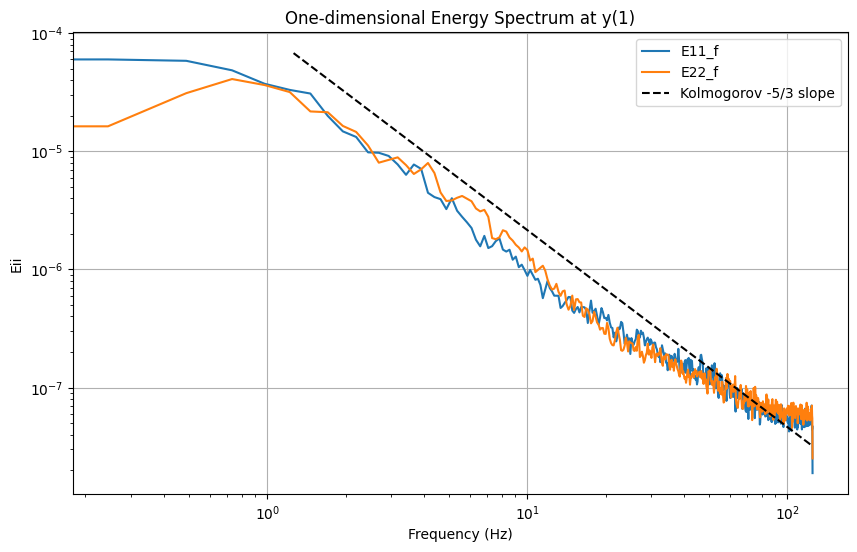

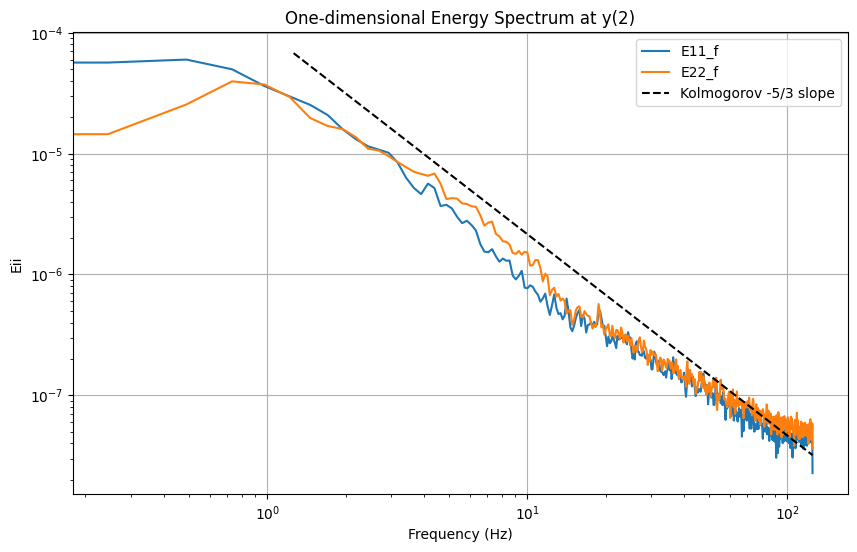

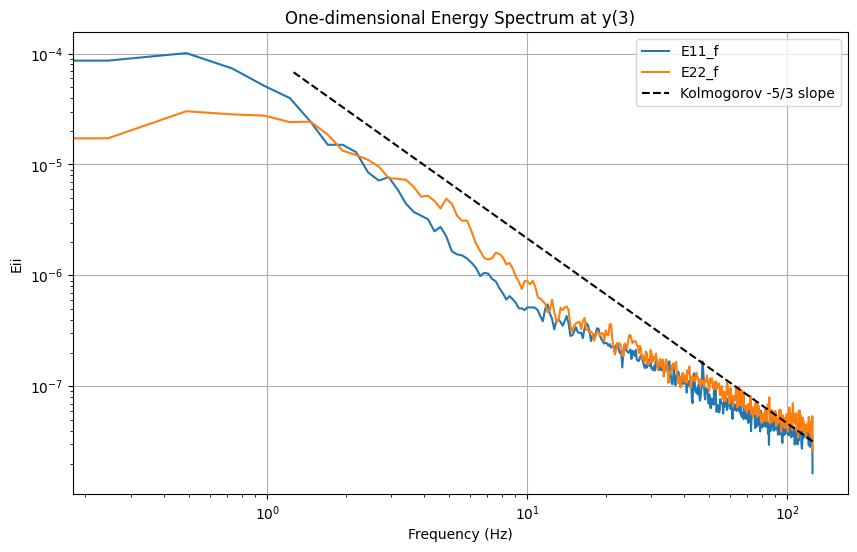

In [38]:
def calculate_energy_spectrum(velocity, dt):
    f, Pxx = welch(velocity, fs=1/dt, nperseg=1024,scaling='density')
    return f, Pxx

def plot_energy_spectrum(frequencies, power_spectral_density, position_label):
    plt.loglog(frequencies, power_spectral_density, label=f'Position {position_label}')

for i, dataset in enumerate(datasets): 
    plt.figure(figsize=(10, 6))
    f, Pxx = calculate_energy_spectrum(dataset[:, 0], dt)
    f, Pyy = calculate_energy_spectrum(dataset[:, 1], dt)
    plot_energy_spectrum(f, Pxx, i)
    plot_energy_spectrum(f, Pyy, i)

    f_kolmogorov = np.linspace(min(f), max(f), 100)
    E_kolmogorov = 0.0001 * f_kolmogorov**(-5/3)
    plt.loglog(f_kolmogorov, E_kolmogorov, 'k--')

    # plt.legend(labels=['E11_f', 'E22_f'])
    plt.legend(labels=['E11_f', 'E22_f','Kolmogorov -5/3 slope'])
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Eii')
    plt.title(fr'One-dimensional Energy Spectrum at y({i+1})')
    plt.grid(True)
    plt.show() 
    


From the three figures above, except the low frequency region, E11 and E22 collapsed well at point y1. From point y1 to y3, E11 and E22 separate gradually, but still collapse in most regions.
In addition, from the comparation of different length scales, $L_{11},L_{22},\lambda_f,\lambda_g$ do not satisfy the correlation under the isotropic condition.
Therefore, we coould only say that the flow is local isotropy at small scales.



**Q6: Comment on the shape of the PDF. Does it make sense? Would you expect the PDF of a velocity increment to look the same? Why or why not?**

PDF of u* at point y1-y3 using 3 different velocity increments are listed below.

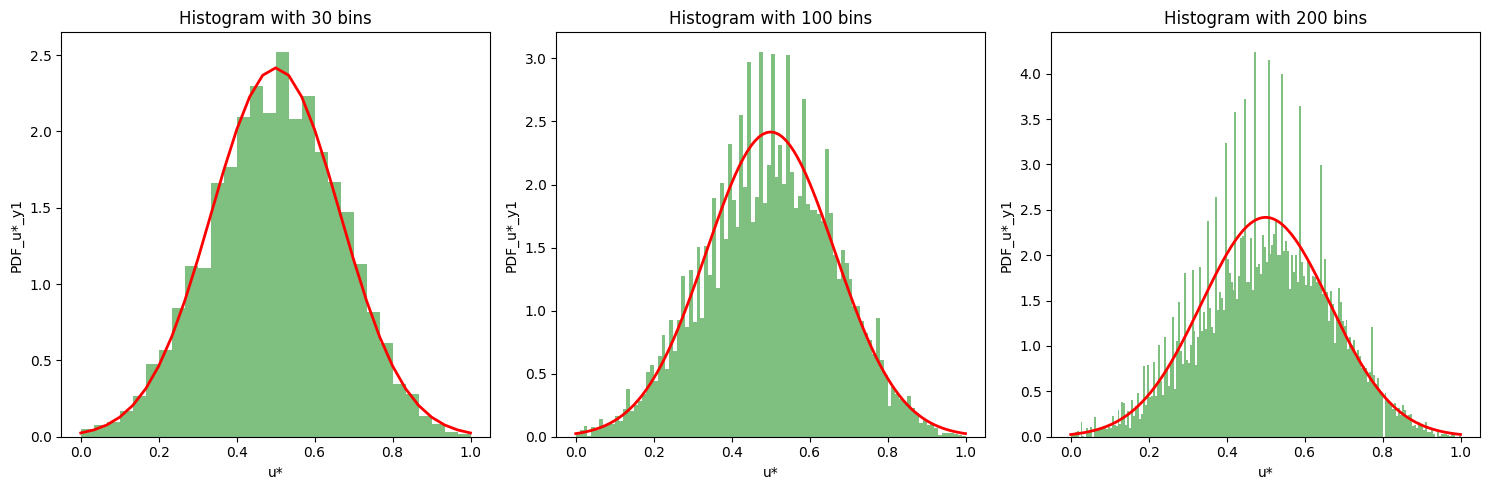

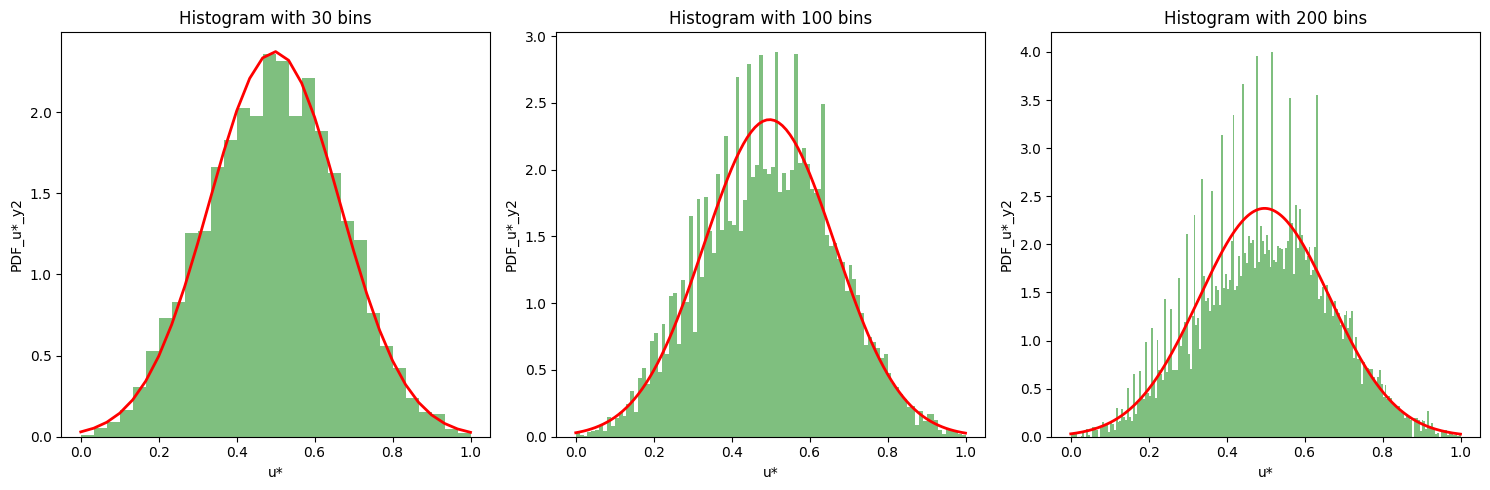

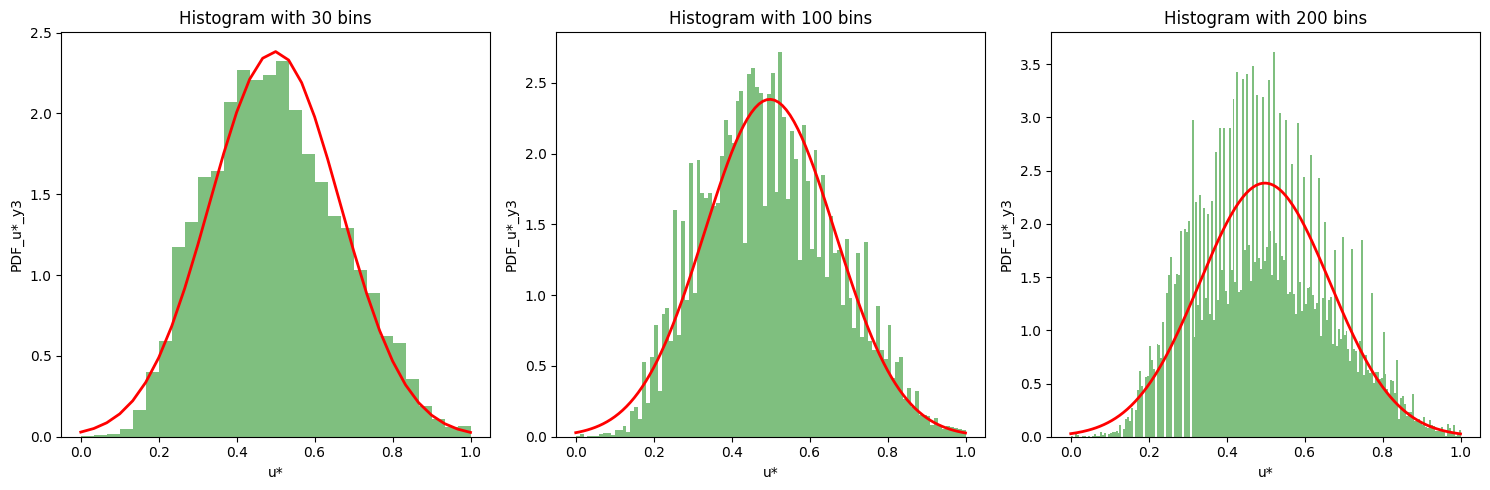

In [237]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

for i, dataset in enumerate(datasets): 
    u_star = (datasets[i][:,0] - np.min(datasets[i][:,0])) / (np.max(datasets[i][:,0]) - np.min(datasets[i][:,0]))
    mean_u_star = np.mean(u_star)
    var_u_star = np.var(u_star)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for j, num_bins in enumerate([30, 100, 200]):
        count, bins, ignored = axs[j].hist(u_star, num_bins, density=True, alpha=0.5, color='g')
        pd = norm.pdf(bins, mean_u_star, np.sqrt(var_u_star))
        axs[j].plot(bins, pd, linewidth=2, color='r')
        axs[j].set_title(f'Histogram with {num_bins} bins')
        axs[j].set_xlabel('u*')
        axs[j].set_ylabel(fr'PDF_u*_y{i+1}')

    plt.tight_layout()

    plt.show()


These PDF are skewed from the bell-shaped Gaussian distribution. Therefore, this flow is not homogeneous flow which is the same conclusion as we reached earlier.

It is generally believed that the central limit theorem is satisfied when the sample size is greater than 30. Therefore, the number of bins should at least larger than 30.

When using fewer bins, many different values are grouped into the same bin, which can result in certain features of the distribution being averaged or ignored. As the number of bins increases, this discretization error decreases, allowing the PDF to more accurately reflect the true distribution of the data. Also, each bin contains fewer data points, which leads to more pronounced statistical fluctuations. This is why in a histogram with 200 bins, some bins may have significantly higher heights than adjacent bins.

**Q7: Comment on the difference between the one-dimensional spectrum measured at each location? Can you estimate the integral length scales from your spectra? Why or why not? Can you calculate the energy spectrum at each location? Why or why not? Is there anything else you could calculate from your spectra?**

**Comment on the difference between the one-dimensional spectrum measured at each location:**

For the one-dimensional spectrum for the fluctuating u field, shown as below.
In the region where f<1, E11 at y1 and y2 are neary same, demonstared that large vortex at these two points have same size. While in this region, E11 at y3 is lager than that in the other two points, represents larger vortex exist at y3 compared with y1 and y2.

In the center of the frequency range, all the spectra exhibit powerlaw behavior. In the meddle and the high frequency regions, E11 at y1 and y2 are a little higher than that in y3, represent more small vortex at y1 and y2.

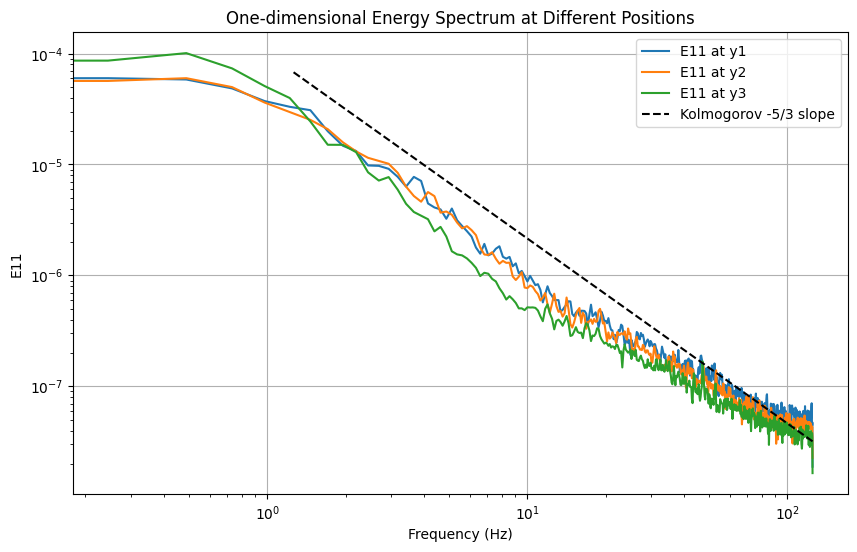

**Can you estimate the integral length scales from your spectra? Why or why not?**

Yes. It is related to the area under the curve of the energy spectrum $E(k)$
as a function of wavenumber k, integrated over all wavenumbers. This is based on the assumption that the spectrum represents how energy is distributed across different scales. The integral length scale L can be estimated using the formula:

$ L = \frac{{\int_0^\infty  {E(k)dk} }}{{\int_0^\infty  {kE(k)dk} }}$

**Can you calculate the energy spectrum at each location? Why or why not?**

No. We don't have velocity sequence in Z direction. And the flow is not isotropic. 

If we assume the flow is isotropic and $E_{22}=E_{33}$, we can calculate the energy spectrum as follows.


C:\Users\11449\AppData\Local\Temp\ipykernel_32968\2978531605.py:16: RuntimeWarning: divide by zero encountered in power
  E_kolmogorov = 0.0001 * f_kolmogorov**(-5/3)


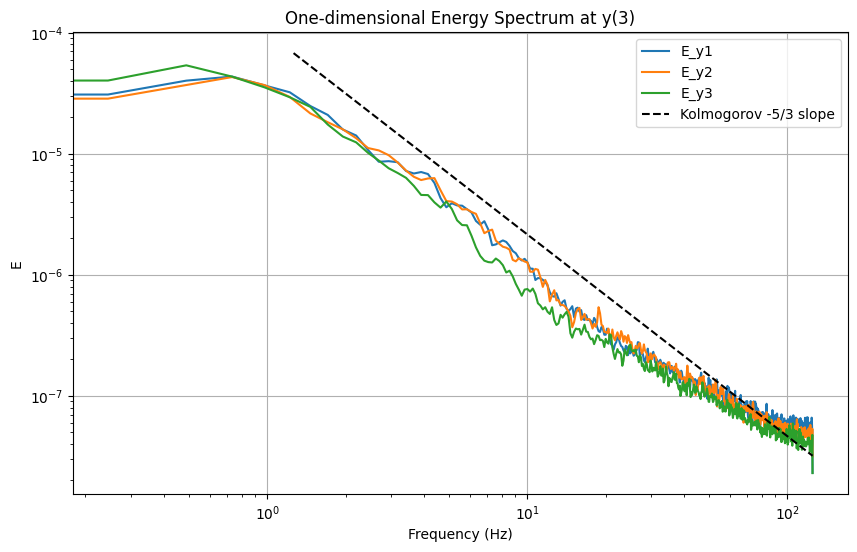

In [46]:
def calculate_energy_spectrum(velocity, dt):
    f, Pxx = welch(velocity, fs=1/dt, nperseg=1024,scaling='density')
    return f, Pxx

def plot_energy_spectrum(frequencies, power_spectral_density, position_label):
    plt.loglog(frequencies, power_spectral_density, label=f'Position {position_label}')

plt.figure(figsize=(10, 6))

for i, dataset in enumerate(datasets): 
    f, Pxx = calculate_energy_spectrum(dataset[:, 0], dt)
    f, Pyy = calculate_energy_spectrum(dataset[:, 1], dt)
    plot_energy_spectrum(f, (Pxx+2*Pyy)/3, i)

f_kolmogorov = np.linspace(min(f), max(f), 100)
E_kolmogorov = 0.0001 * f_kolmogorov**(-5/3)
plt.loglog(f_kolmogorov, E_kolmogorov, 'k--')

# plt.legend(labels=['E11_f', 'E22_f'])
plt.legend(labels=['E_y1', 'E_y2','E_y3','Kolmogorov -5/3 slope'])

plt.xlabel('Frequency (Hz)')
plt.ylabel('E')
plt.title(fr'One-dimensional Energy Spectrum at y({i+1})')
plt.grid(True)
plt.show() 
    


**Is there anything else you could calculate from your spectra?**

1. Turbulent Kinetic Energy: ${k_{({\kappa _a},{\kappa _b})}} = \int\limits_{{\kappa _a}}^{{\kappa _b}} {E(\kappa )d\kappa }$

1. Dissipation rate: $ {\varepsilon _{({\kappa _a},{\kappa _b})}} = \int\limits_{{\kappa _a}}^{{\kappa _b}} {2\nu {\kappa ^2}E(\kappa )d\kappa }$

